In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

dv001.ib.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/IPMI-2023


In [2]:
import sys, os
import numpy as np
import pandas as pd

sys.path.append('..')
%aimport mre_pinn

sys.path.append('../../param_search')
%aimport param_search
ps = param_search

Using backend: pytorch



# IPMI 2023 patient experiment

In [3]:
%pwd

'/ocean/projects/asc170022p/mtragoza/mre-pinn/IPMI-2023'

In [10]:
# define the job template and name format

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH --time=48:00:00
#SBATCH -o %J.stdout
#SBATCH -e %J.stderr
#SBATCH --mail-type=all

hostname
pwd
source activate MRE-PINN

python ../../../train.py \\
    --xarray_dir {xarray_dir} \\
    --example_id {example_id} \\
    --frequency {frequency} \\
    --omega {omega} \\
    --polar_input {polar_input} \\
    --pde_name {pde_name} \\
    --pde_warmup_iters 10000 \\
    --pde_step_iters 5000 \\
    --pde_step_factor 10 \\
    --pde_init_weight {pde_init_weight} \\
    --pde_loss_weight {pde_loss_weight} \\
    --save_prefix {job_name}    
'''
name = 'train_{data_name}_{example_id}_{omega}_{pde_name}'

# define the parameter space

patient_space = ps.ParamSpace(
    data_name='patient',
    xarray_dir='../../../data/NAFLD/v3',
    example_id=['0006', '0020', '0024', '0029', '0043', '0047', '0126', '0135', '0155', '0164', '0172', '0173', '0210', '0213', '0219', '0222', '0234', '0235', '0291', '0344', '0378', '0384', '0395', '0401', '0415', '0457', '0461', '0491', '0492', '0496', '0509', '0510', '0516', '0525', '0564', '0604', '0612', '0615', '0628', '0639', '0648', '0650', '0653', '0655', '0659', '0693', '0704', '0717', '0727', '0734', '0737', '0740', '0747', '0748', '0898', '0900', '0929', '0931', '0932', '0940', '0954', '0964', '0965', '0979', '0989', '0995', '1028', '1033', '1039', '1045', '1075', '1076', '1077', '1083', '1103', '1106', '1108', '1110', '1119', '1121', '1123', '1134', '1144', '1149', '1205', '1207', '1215', '1217', '1230', '1261', '1271', '1296', '1303', '1311', '1329', '1337', '1341', '1343', '1344', '1382', '1395', '1400', '1404', '1417', '1426', '1427', '1433', '1435', '1448', '1453', '1456', '1464', '1671', '1679', '1694', '1699', '1706', '1712', '1714', '1715', '1720', '1722', '1727', '1736', '1748', '1785', '1786', '1790', '1791', '1793', '1795', '1798', '1806', '1807', '1819', '1829', '1839', '1843', '1851', '1853', '1896', '1899', '1903', '1917', '1935', '1940', '1948', '1967', '1979', '1980', '2001', '2007', '2029', '2034', '2046'],
    frequency=40,
    omega=60,
    pde_name=['hetero'],
    pde_init_weight=1e-18,
    pde_loss_weight=1e-16,
    polar_input=1,
)
patient_space2 = ps.ParamSpace(
    data_name='patient',
    xarray_dir='../../../data/NAFLD/v3',
    example_id=['0006', '0020', '0024', '0029', '0043', '0047', '0126', '0135', '0155', '0164', '0172', '0173', '0210', '0213', '0219', '0222', '0234', '0235', '0291', '0344', '0378', '0384', '0395', '0401', '0415', '0457', '0461', '0491', '0492', '0496', '0509', '0510', '0516', '0525', '0564', '0604', '0612', '0615', '0628', '0639', '0648', '0650', '0653', '0655', '0659', '0693', '0704', '0717', '0727', '0734', '0737', '0740', '0747', '0748', '0898', '0900', '0929', '0931', '0932', '0940', '0954', '0964', '0965', '0979', '0989', '0995', '1028', '1033', '1039', '1045', '1075', '1076', '1077', '1083', '1103', '1106', '1108', '1110', '1119', '1121', '1123', '1134', '1144', '1149', '1205', '1207', '1215', '1217', '1230', '1261', '1271', '1296', '1303', '1311', '1329', '1337', '1341', '1343', '1344', '1382', '1395', '1400', '1404', '1417', '1426', '1427', '1433', '1435', '1448', '1453', '1456', '1464', '1671', '1679', '1694', '1699', '1706', '1712', '1714', '1715', '1720', '1722', '1727', '1736', '1748', '1785', '1786', '1790', '1791', '1793', '1795', '1798', '1806', '1807', '1819', '1829', '1839', '1843', '1851', '1853', '1896', '1899', '1903', '1917', '1935', '1940', '1948', '1967', '1979', '1980', '2001', '2007', '2029', '2034', '2046'],
    frequency=40,
    omega=60,
    pde_name=['helmholtz', 'hetero2'],
    pde_init_weight=1e-18,
    pde_loss_weight=1e-16,
    polar_input=1,
)
patient_space3 = ps.ParamSpace(
    data_name='patient',
    xarray_dir='../../../data/NAFLD/v3',
    example_id=['0006', '0020', '0024', '0029', '0043', '0047', '0126', '0135', '0155', '0164', '0172', '0173', '0210', '0213', '0219', '0222', '0234', '0235', '0291', '0344', '0378', '0384', '0395', '0401', '0415', '0457', '0461', '0491', '0492', '0496', '0509', '0510', '0516', '0525', '0564', '0604', '0612', '0615', '0628', '0639', '0648', '0650', '0653', '0655', '0659', '0693', '0704', '0717', '0727', '0734', '0737', '0740', '0747', '0748', '0898', '0900', '0929', '0931', '0932', '0940', '0954', '0964', '0965', '0979', '0989', '0995', '1028', '1033', '1039', '1045', '1075', '1076', '1077', '1083', '1103', '1106', '1108', '1110', '1119', '1121', '1123', '1134', '1144', '1149', '1205', '1207', '1215', '1217', '1230', '1261', '1271', '1296', '1303', '1311', '1329', '1337', '1341', '1343', '1344', '1382', '1395', '1400', '1404', '1417', '1426', '1427', '1433', '1435', '1448', '1453', '1456', '1464', '1671', '1679', '1694', '1699', '1706', '1712', '1714', '1715', '1720', '1722', '1727', '1736', '1748', '1785', '1786', '1790', '1791', '1793', '1795', '1798', '1806', '1807', '1819', '1829', '1839', '1843', '1851', '1853', '1896', '1899', '1903', '1917', '1935', '1940', '1948', '1967', '1979', '1980', '2001', '2007', '2029', '2034', '2046'],
    frequency=40,
    omega=[30, 60],
    pde_name=['hetero'],
    pde_init_weight=1e-18,
    pde_loss_weight=1e-16,
    polar_input=1,
)

param_space = patient_space3
len(param_space)

310

In [30]:
%autoreload

expt_names = [
    '2022-11-23_patient_init',
    '2022-11-26_patient_hetero2',
    '2022-12-5_patient_omega',
    '2022-12-12_patient_hetero'
]

#jobs = ps.submit(template, name, param_space, work_dir=expt_name, verbose=True)
#jobs.to_csv(f'{expt_name}.jobs')

jobs = pd.concat([
    pd.read_csv(f'{expt_names[0]}.jobs'),
    pd.read_csv(f'{expt_names[2]}.jobs')
])

In [31]:
status_cols = ['job_name', 'job_state', 'node_id', 'runtime', 'stdout', 'stderr']
status = ps.status(jobs)
status[status_cols]

,job_name,job_state,node_id,runtime,stdout,stderr
job_id,,,,,,
13284149,train_patient_0006_hetero,NaN,NaN,NaN,v005.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13284150,train_patient_0020_hetero,NaN,NaN,NaN,v005.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13284151,train_patient_0024_hetero,NaN,NaN,NaN,v003.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13284152,train_patient_0029_hetero,NaN,NaN,NaN,v008.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13284153,train_patient_0043_hetero,NaN,NaN,NaN,v008.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
...,...,...,...,...,...,...
13521380,train_patient_2034_60_hetero2,NaN,NaN,NaN,v012.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nTraceback (most rece...
13521381,train_patient_2046_30_helmholtz,NaN,NaN,NaN,v026.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13521382,train_patient_2046_30_hetero2,NaN,NaN,NaN,v032.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\nTraceback (most rece...


In [16]:
errors = status[status.stderr != 'Using backend: pytorch\n\n']
len(status)

620

In [32]:
metrics = ps.metrics(jobs)

# did all models train to 100k iterations?
#assert (metrics.groupby('job_name')['iteration'].max() == 100e3).all()

# get the final test evaluations
metrics = metrics[metrics.iteration == 100e3]

param_cols = ['pde_name', 'example_id', 'omega'] # experimental parameters
index_cols = ['variable_name', 'spatial_frequency_bin', 'spatial_region'] # metric identifiers
metric_cols = ['MSAV', 'PSD', 'MAV', 'R'] # metric values

metrics = metrics.groupby(param_cols + index_cols, sort=False)[metric_cols].mean()
metrics = metrics.unstack(level=[len(param_cols)])

def metric_map(t):
    metric_name, var_name = t
    new_col_name = f'{var_name}_{metric_name}'
    new_col_name = new_col_name.replace('diff_MSAV', 'pred_MSAE')
    new_col_name = new_col_name.replace('pde_diff_MSAV', 'PDE_MSAE')
    new_col_name = new_col_name.replace('diff_MAV', 'pred_MAD')
    return new_col_name

metrics.columns = [metric_map(t) for t in metrics.columns.to_flat_index()]
metrics

train_patient_0932_hetero No objects to concatenate
train_patient_0940_hetero No objects to concatenate
train_patient_0989_hetero No objects to concatenate
train_patient_1404_hetero No objects to concatenate
train_patient_1679_hetero No objects to concatenate
train_patient_1699_hetero No objects to concatenate
train_patient_1851_hetero No objects to concatenate
train_patient_1979_hetero No objects to concatenate
train_patient_1980_hetero No objects to concatenate
train_patient_0006_30_hetero2 No objects to concatenate
train_patient_0006_60_hetero2 No objects to concatenate
train_patient_0020_30_hetero2 No objects to concatenate
train_patient_0020_60_hetero2 No objects to concatenate
train_patient_0024_30_hetero2 No objects to concatenate
train_patient_0024_60_hetero2 No objects to concatenate
train_patient_0029_30_hetero2 No objects to concatenate
train_patient_0029_60_hetero2 No objects to concatenate
train_patient_0043_30_hetero2 No objects to concatenate
train_patient_0043_60_hetero

train_patient_1083_60_hetero2 No objects to concatenate
train_patient_1103_30_hetero2 No objects to concatenate
train_patient_1103_60_hetero2 No objects to concatenate
train_patient_1106_30_hetero2 No objects to concatenate
train_patient_1106_60_hetero2 No objects to concatenate
train_patient_1108_30_hetero2 No objects to concatenate
train_patient_1108_60_hetero2 No objects to concatenate
train_patient_1110_30_hetero2 No objects to concatenate
train_patient_1110_60_hetero2 No objects to concatenate
train_patient_1119_30_hetero2 No objects to concatenate
train_patient_1119_60_hetero2 No objects to concatenate
train_patient_1121_30_hetero2 No objects to concatenate
train_patient_1121_60_hetero2 No objects to concatenate
train_patient_1123_30_hetero2 No objects to concatenate
train_patient_1123_60_hetero2 No objects to concatenate
train_patient_1134_30_hetero2 No objects to concatenate
train_patient_1134_60_hetero2 No objects to concatenate
train_patient_1144_30_hetero2 No objects to conc

train_patient_2029_60_hetero2 No objects to concatenate
train_patient_2034_30_hetero2 No objects to concatenate
train_patient_2034_60_hetero2 No objects to concatenate
train_patient_2046_30_hetero2 No objects to concatenate
train_patient_2046_60_hetero2 No objects to concatenate


u_pred_MSAV  \
pde_name  example_id omega spatial_frequency_bin spatial_region                
hetero    6          60    all                   all                0.000075   
                                                 0.0                     NaN   
                                                 1.0                     NaN   
                           1.0                   all                     NaN   
                           2.0                   all                     NaN   
...                                                                      ...   
helmholtz 1980       30    6.0                   all                     NaN   
                           7.0                   all                     NaN   
                           8.0                   all                     NaN   
                           9.0                   all                     NaN   
                           10.0                  all                     NaN   

                                                                  u_pred_MSAE  \
pde_name  example_id omega spatial_frequency_bin spatial_region                 
hetero    6          60    all                   all             3.906129e-07   
                                                 0.0                      NaN   
                                                 1.0                      NaN   
                           1.0                   all                      NaN   
                           2.0                   all                      NaN   
...                                                                       ...   
helmholtz 1980       30    6.0                   all                      NaN   
                           7.0                   all                      NaN   
                           8.0                   all                      NaN   
                           9.0                   all                      NaN   
                           10.0                  all                      NaN   

                                                                 u_true_MSAV  \
pde_name  example_id omega spatial_frequency_bin spatial_region                
hetero    6          60    all                   all                0.000075   
                                                 0.0                     NaN   
                                                 1.0                     NaN   
                           1.0                   all                     NaN   
                           2.0                   all                     NaN   
...                                                                      ...   
helmholtz 1980       30    6.0                   all                     NaN   
                           7.0                   all                     NaN   
                           8.0                   all                     NaN   
                           9.0                   all                     NaN   
                           10.0                  all                     NaN   

                                                                  lu_pred_MSAV  \
pde_name  example_id omega spatial_frequency_bin spatial_region                  
hetero    6          60    all                   all             159217.646761   
                                                 0.0                       NaN   
                                                 1.0                       NaN   
                           1.0                   all                       NaN   
                           2.0                   all                       NaN   
...                                                                        ...   
helmholtz 1980       30    6.0                   all                       NaN   
                           7.0                   all                       NaN   
                           8.0                   all                       NaN   
                           

In [33]:
m = metrics.reset_index()

#fig = ps.plot(
#    m[m.spatial_region == 'all'],
#    x=param_cols,
#    y=['u_pred_MSAE', 'mu_pred_MSAE', 'direct_pred_MSAE', 'fem_pred_MSAE'],
#    height=2.5,
#    width=2.5,
#    legend=False,
#    tight=True
#)

In [34]:
m.columns

Index(['pde_name', 'example_id', 'omega', 'spatial_frequency_bin',
       'spatial_region', 'u_pred_MSAV', 'u_pred_MSAE', 'u_true_MSAV',
       'lu_pred_MSAV', 'lu_pred_MSAE', 'Lu_true_MSAV', 'f_trac_MSAV',
       'pde_pred_MSAE', 'pde_grad_MSAV', 'mu_pred_MSAV', 'mu_pred_MSAE',
       'mu_true_MSAV', 'direct_pred_MSAV', 'direct_pred_MSAE', 'fem_pred_MSAV',
       'fem_pred_MSAE', 'u_pred_PSD', 'u_diff_PSD', 'u_true_PSD',
       'lu_pred_PSD', 'lu_diff_PSD', 'Lu_true_PSD', 'f_trac_PSD',
       'pde_diff_PSD', 'pde_grad_PSD', 'mu_pred_PSD', 'mu_diff_PSD',
       'mu_true_PSD', 'direct_pred_PSD', 'direct_diff_PSD', 'fem_pred_PSD',
       'fem_diff_PSD', 'u_pred_MAV', 'u_pred_MAD', 'u_true_MAV', 'lu_pred_MAV',
       'lu_pred_MAD', 'Lu_true_MAV', 'f_trac_MAV', 'pde_pred_MAD',
       'pde_grad_MAV', 'mu_pred_MAV', 'mu_pred_MAD', 'mu_true_MAV',
       'direct_pred_MAV', 'direct_pred_MAD', 'fem_pred_MAV', 'fem_pred_MAD',
       'u_pred_R', 'u_diff_R', 'u_true_R', 'lu_pred_R', 'lu_diff_R',
  

In [42]:
m['method'] = 'PINN_' + m['pde_name']

direct_m = m[m.pde_name == 'helmholtz'].copy()
direct_m['method'] = 'direct_helmholtz'
for col in m.columns:
    if col.startswith('direct'):
        direct_m[col.replace('direct', 'mu')] = m[col]
        
hh_fem_m = m[m.pde_name == 'helmholtz'].copy()
hh_fem_m['method'] = 'FEM_helmholtz'
for col in m.columns:
    if col.startswith('fem'):
        hh_fem_m[col.replace('fem', 'mu')] = m[col]

ht_fem_m = m[m.pde_name == 'hetero'].copy()
ht_fem_m['method'] = 'FEM_hetero'
for col in m.columns:
    if col.startswith('fem'):
        ht_fem_m[col.replace('fem', 'mu')] = m[col]
        
mm = pd.concat([direct_m, hh_fem_m, ht_fem_m, m])

method_order = ['direct_helmholtz', 'FEM_helmholtz', 'FEM_hetero', 'PINN_helmholtz', 'PINN_hetero']
mm['method_index'] = mm['method'].map(method_order.index)
mm = mm.sort_values('method_index')

In [50]:
import matplotlib as mpl
pct_format = mpl.ticker.PercentFormatter()

mm['mu_pred_MSAE_relative'] = mm['mu_pred_MSAE'] / mm['mu_true_MSAV'] * 100
mm['mu_pred_MAD_relative'] = mm['mu_pred_MAD'] / mm['mu_true_MAV'] * 100

In [51]:
%autoreload
import seaborn as sns
import matplotlib.pyplot as plt

colors = ps.results.get_color_palette(10, type='deep', min_val=0)
blue, orange, green, red, purple, brown, pink, gray, yellow, cyan = colors

colors = [blue, yellow, red, cyan, green]
#colors = [blue, yellow, cyan]
sns.set_palette(colors)
colors = sns.color_palette()
colors

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196)]

In [53]:
mm.spatial_region.unique()

array(['all', '0.0', '1.0'], dtype=object)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[group_name] = df[group_cols].astype(str).agg(sep.join, axis=1)



<IPython.core.display.Javascript object>


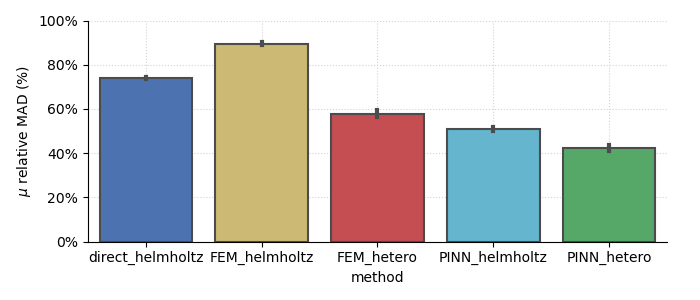

In [52]:
fig = ps.plot(
    mm[~mm.spatial_region.isin({'0.0', 'all'})],
    x='method',
    y='mu_pred_MAD_relative',
    height=3,
    width=7,
    legend=True,
    tight=True,
    plot_func=ps.results.barplot
)
fig.axes[0].set_ylabel('$\mu$ relative MAD (%)')
fig.axes[0].set_ylim(0, 100)
fig.axes[0].yaxis.set_major_formatter(pct_format)
fig.tight_layout()

for i, patch in enumerate(fig.axes[0].patches):
    plt.setp(patch, facecolor=colors[i])   

for ext in ['png', 'pdf']:
    fig.savefig(f'images/patient_method_bar_plot.{ext}', bbox_inches='tight', dpi=200)

<IPython.core.display.Javascript object>


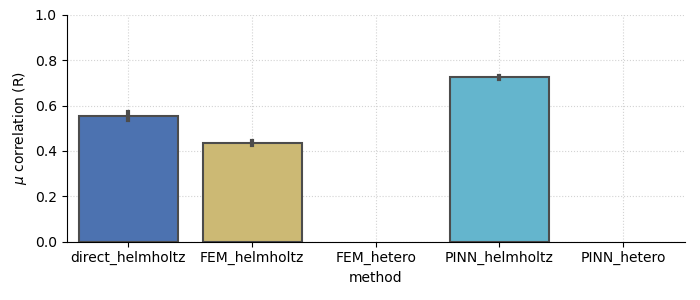

  boot_dist.append(f(*sample, **func_kwargs))

  r, k = function_base._ureduce(a,

  boot_dist.append(f(*sample, **func_kwargs))

  r, k = function_base._ureduce(a,



In [55]:
fig = ps.plot(
    mm[(mm.spatial_region == 'all') & (mm.spatial_frequency_bin == 'all')].copy(), # across all omegas
    x='method',
    hue='method',
    y='mu_pred_R',
    height=3,
    width=7,
    legend=False,
    tight=True,
    plot_func=ps.results.barplot
)
fig.axes[0].set_ylabel('$\mu$ correlation (R)')
fig.axes[0].set_ylim([0, 1])

for i, patch in enumerate(fig.axes[0].patches):
    plt.setp(patch, facecolor=colors[i])

for ext in ['png', 'pdf']:
    fig.savefig(f'images/patient_method_R_bar_plot.{ext}', bbox_inches='tight', dpi=200)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[group_name] = df[group_cols].astype(str).agg(sep.join, axis=1)



<IPython.core.display.Javascript object>


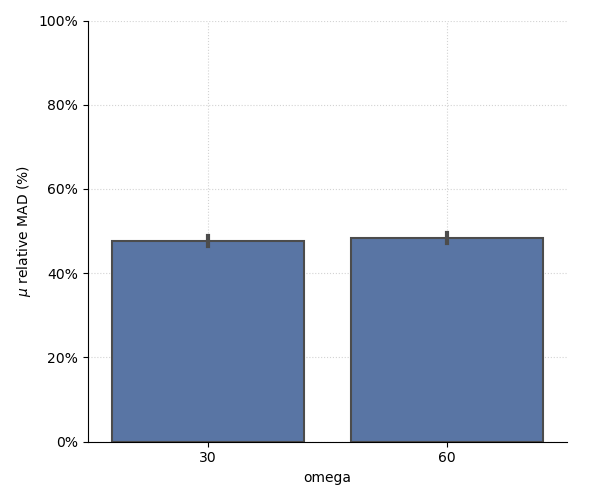

In [60]:
fig = ps.plot(
    mm[~mm.spatial_region.isin({'0', 'all'}) & mm.method.str.startswith('PINN')], 
    x='omega',
    y='mu_pred_MAD_relative',
    height=5,
    width=6,
    legend=True,
    tight=True,
    plot_func=ps.results.barplot
)
fig.axes[0].set_ylabel('$\mu$ relative MAD (%)')
fig.axes[0].yaxis.set_major_formatter(pct_format)
fig.axes[0].set_ylim(0, 100)
fig.tight_layout()

fig.axes[0].set_xlabel('omega')

for ext in ['png', 'pdf']:
    fig.savefig(f'images/patient_omega_bar_plot.{ext}', bbox_inches='tight', dpi=200)

In [62]:
%autoreload

blue, orange, green, red, purple, brown, pink, gray, yellow, cyan = sns.color_palette('tab10')

mre_pinn.visual.COLORS.update(
    red=red,
    yellow=yellow,
    green=green,
    cyan=cyan,
    blue=blue
)

<IPython.core.display.Javascript object>


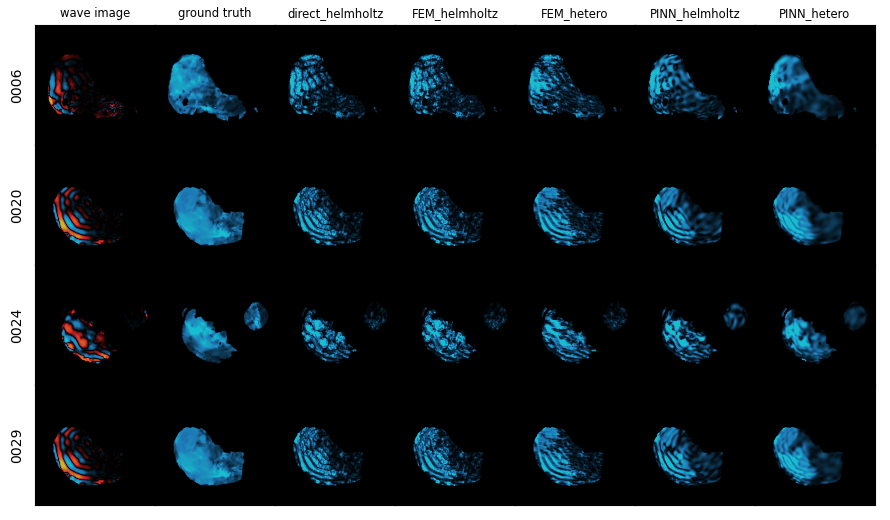

Loading ../data/NAFLD/v3/0006/wave.nc
Loading ../data/NAFLD/v3/0006/mre.nc
Loading ../data/NAFLD/v3/0006/mre_mask.nc
Loading 2022-11-26_patient_hetero2/train_patient_0006_helmholtz/train_patient_0006_helmholtz_direct.nc
Loading 2022-11-26_patient_hetero2/train_patient_0006_helmholtz/train_patient_0006_helmholtz_fem.nc
Loading 2022-11-23_patient_init/train_patient_0006_hetero/train_patient_0006_hetero_fem.nc
Loading 2022-11-26_patient_hetero2/train_patient_0006_helmholtz/train_patient_0006_helmholtz_elastogram.nc
Loading 2022-11-23_patient_init/train_patient_0006_hetero/train_patient_0006_hetero_elastogram.nc
Loading ../data/NAFLD/v3/0020/wave.nc
Loading ../data/NAFLD/v3/0020/mre.nc
Loading ../data/NAFLD/v3/0020/mre_mask.nc
Loading 2022-11-26_patient_hetero2/train_patient_0020_helmholtz/train_patient_0020_helmholtz_direct.nc
Loading 2022-11-26_patient_hetero2/train_patient_0020_helmholtz/train_patient_0020_helmholtz_fem.nc
Loading 2022-11-23_patient_init/train_patient_0020_hetero/train_

<IPython.core.display.Javascript object>


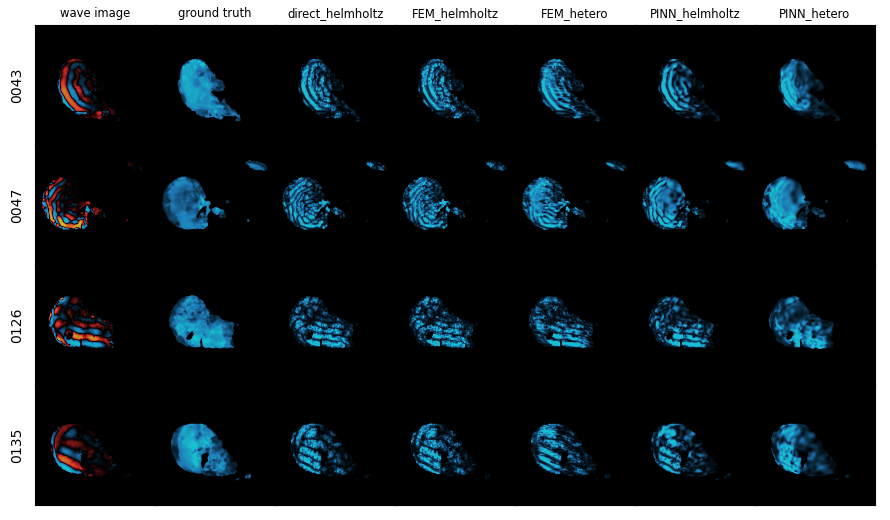

Loading ../data/NAFLD/v3/0043/wave.nc
Loading ../data/NAFLD/v3/0043/mre.nc
Loading ../data/NAFLD/v3/0043/mre_mask.nc
Loading 2022-11-26_patient_hetero2/train_patient_0043_helmholtz/train_patient_0043_helmholtz_direct.nc
Loading 2022-11-26_patient_hetero2/train_patient_0043_helmholtz/train_patient_0043_helmholtz_fem.nc
Loading 2022-11-23_patient_init/train_patient_0043_hetero/train_patient_0043_hetero_fem.nc
Loading 2022-11-26_patient_hetero2/train_patient_0043_helmholtz/train_patient_0043_helmholtz_elastogram.nc
Loading 2022-11-23_patient_init/train_patient_0043_hetero/train_patient_0043_hetero_elastogram.nc
Loading ../data/NAFLD/v3/0047/wave.nc
Loading ../data/NAFLD/v3/0047/mre.nc
Loading ../data/NAFLD/v3/0047/mre_mask.nc
Loading 2022-11-26_patient_hetero2/train_patient_0047_helmholtz/train_patient_0047_helmholtz_direct.nc
Loading 2022-11-26_patient_hetero2/train_patient_0047_helmholtz/train_patient_0047_helmholtz_fem.nc
Loading 2022-11-23_patient_init/train_patient_0047_hetero/train_

In [77]:
%autoreload
import mre_pinn

image_names = ['wave image', 'ground truth', 'direct_helmholtz', 'FEM_helmholtz', 'FEM_hetero', 'PINN_helmholtz', 'PINN_hetero']

def plot_image_grid(example_ids):
    n_rows = len(example_ids)
    n_cols = len(image_names)
    ax_width = 1.2
    ax_height = ax_width

    fig, axes, cbar_ax = mre_pinn.visual.subplot_grid(n_rows, n_cols, ax_height, ax_width, space=0, pad=(0.35,0.15,0.15,0.25))
    for row_idx, example_id in enumerate(example_ids):
        example = mre_pinn.data.MREExample.load_xarrays('../data/NAFLD/v3', example_id)
        for col_idx, image_name in enumerate(image_names):
            ax = axes[row_idx,col_idx]
            #ax.text(0.1, 0.1, f'{row_idx}, {col_idx}')
            if col_idx == 0:
                ax.set_ylabel(example_id, fontsize='medium')
            if row_idx == 0:
                ax.set_title(image_name, fontsize='small')
            ax.set_yticks([])
            ax.set_xticks([])

            if image_name == 'wave image':
                array = example.wave[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = array.real * example.mre_mask.values[...,0]

            elif image_name == 'ground truth':
                array = example.mre[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array) * example.mre_mask.values[...,0]

            elif image_name == 'direct_helmholtz':
                nc_file = f'2022-11-26_patient_hetero2/train_patient_{example_id}_helmholtz/train_patient_{example_id}_helmholtz_direct.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='direct_pred')[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'FEM_helmholtz':
                nc_file = f'2022-11-26_patient_hetero2/train_patient_{example_id}_helmholtz/train_patient_{example_id}_helmholtz_fem.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='fem_pred')[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'FEM_hetero':
                nc_file = f'2022-11-23_patient_init/train_patient_{example_id}_hetero/train_patient_{example_id}_hetero_fem.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='fem_pred')[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'PINN_helmholtz':
                nc_file = f'2022-11-26_patient_hetero2/train_patient_{example_id}_helmholtz/train_patient_{example_id}_helmholtz_elastogram.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred')[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'PINN_hetero':
                nc_file = f'2022-11-23_patient_init/train_patient_{example_id}_hetero/train_patient_{example_id}_hetero_elastogram.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred')[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            mre_pinn.visual.imshow(ax, array[:-24,8:-16], **color_kws)
    
    return fig

fig0 = plot_image_grid(['0006', '0020', '0024', '0029'])
fig1 = plot_image_grid(['0043', '0047', '0126', '0135'])

for ext in ['png', 'pdf']:
    fig0.savefig(f'images/patient_example_grid0.{ext}', bbox_inches='tight', dpi=200)
    fig1.savefig(f'images/patient_example_grid1.{ext}', bbox_inches='tight', dpi=200)

In [ ]:
example = mre_pinn.data.MREExample.load_xarrays('../data/NAFLD/v3', '0006')
example.view()

In [ ]:
import xarray as xr
u = example.wave
x = u.field.points(reshape=False)
x = (x - x.mean(axis=(0,1,2), keepdims=True)) / (x.max(axis=(0,1,2), keepdims=True) - x.min(axis=(0,1,2), keepdims=True))
x, y, z = x[...,0], x[...,1], x[...,2]
r = np.sqrt(x**2 + y**2)
sin = y / (r + 1e-3)
cos = x / (r + 1e-3)
x = np.stack([x, y, z, r, sin, cos], axis=-1)

print(x.shape)
x_dims = ['x', 'y', 'z', 'component']
x_coords = {
    'x': u.x,
    'y': u.y,
    'z': u.z,
    'component': ['x', 'y', 'z', 'r', 'sin', 'cos']
}
x = xr.DataArray(x, coords=x_coords, dims=x_dims)
x.name = 'position'
mre_pinn.visual.XArrayViewer(x, ax_height=3)

In [ ]:
example.wave.coords